In [1]:
from notebook import *
from search import *
import warnings

In [2]:
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

Data for burning building

In [4]:

room_map = UndirectedGraph(dict(
    H10=dict(H11=5,S10=5),
    H11=dict(H10=5,R11=5,H12=5),
    H12=dict(H11=5,R12=5,H13=5),
    H13=dict(H12=5,R13=5,H14=5),
    H14=dict(H13=5,R14=5,H15=5),
    H15=dict(H14=5,H16=5),
    H16=dict(H15=5,R16=5,H17=5),
    H17=dict(H16=5,R17=5,H18=5),
    H18=dict(H17=5,R18=5,H19=5),
    H19=dict(H18=5,S19=5),
    S19=dict(H19=5,S29=10,EXIT=10),

    EXIT=dict(S19=10),
    S10=dict(H10=5,S20=10),
    R11=dict(H11=5),
    R12=dict(H12=5,R13=5),
    R13=dict(H13=5,R12=5),
    R14=dict(H14=5,R15=5),
    R15=dict(H15=5,R14=5,R16=5),
    R16=dict(H16=5,R15=5),
    R17=dict(H17=5),
    R18=dict(H18=5),
    R19=dict(H19=5),

    H20=dict(H21=5,S20=5),
    H21=dict(H20=5,R21=5,H22=5),
    H22=dict(H21=5,R22=5,H23=5),
    H23=dict(H22=5,R23=5,H24=5),
    H24=dict(H23=5,R24=5,H25=5),
    H25=dict(H24=5,H26=5),
    H26=dict(H25=5,R26=5,H27=5),
    H27=dict(H26=5,R27=5,H28=5),
    H28=dict(H27=5,R28=5,H29=5),
    H29=dict(H28=5,S29=5),
    S29=dict(H29=5,S19=10,S39=10),

    S20=dict(H20=5,S10=5,S30=10),
    R21=dict(H21=5),
    R22=dict(H22=5,R23=5),
    R23=dict(H23=5,R22=5),
    R24=dict(H24=5,R25=5),
    R25=dict(H25=5,R24=5,R26=5),
    R26=dict(H26=5,R25=5),
    R27=dict(H27=5),
    R28=dict(H28=5),
    R29=dict(H29=5),

    H30=dict(H31=5,S30=5),
    H31=dict(H30=5,R31=5,H32=5),
    H32=dict(H31=5,R32=5,H33=5),
    H33=dict(H32=5,R33=5,H34=5),
    H34=dict(H33=5,R34=5,H35=5),
    H35=dict(H34=5,H36=5),
    H36=dict(H35=5,R36=5,H37=5),
    H37=dict(H36=5,R37=5,H38=5),
    H38=dict(H37=5,R38=5,H39=5),
    H39=dict(H38=5,S39=5),
    S39=dict(H39=5,S29=10,S49=10),

    S30=dict(H30=5,S20=10),
    R31=dict(H31=5),
    R32=dict(H32=5,R33=5),
    R33=dict(H33=5,R32=5),
    R34=dict(H34=5,R35=5),
    R35=dict(H35=5,R34=5,R36=5),
    R36=dict(H36=5,R35=5),
    R37=dict(H37=5),
    R38=dict(H38=5),
    R39=dict(H39=5),

    H40=dict(H41=5,S40=5),
    H41=dict(H40=5,R41=5,H42=5),
    H42=dict(H41=5,R42=5,H43=5),
    H43=dict(H42=5,R43=5,H44=5),
    H44=dict(H43=5,R44=5,H45=5),
    H45=dict(H44=5,H46=5),
    H46=dict(H45=5,R46=5,H47=5),
    H47=dict(H46=5,R47=5,H48=5),
    H48=dict(H47=5,R48=5,H49=5),
    H49=dict(H48=5,S49=5),
    S49=dict(H49=5,S39=10),

    S40=dict(H40=5,S30=10),
    R41=dict(H41=5),
    R42=dict(H42=5,R43=5),
    R43=dict(H43=5,R42=5),
    R44=dict(H44=5,R45=5),
    R45=dict(H45=5,R44=5,R46=5),
    R46=dict(H46=5,R45=5),
    R47=dict(H47=5),
    R48=dict(H48=5),
    R49=dict(H49=5)
    
    ))


In [5]:

room_map.locations = dict(
    H10=(40,50),
    H11=(50,50),
    H12=(60,50),
    H13=(70,50),
    H14=(80,50),
    H15=(90,50),
    H16=(100,50),
    H17=(110,50),
    H18=(120,50),
    H19=(130,50),

    S10=(40,50),
    R11=(50,60),
    R12=(60,60),
    R13=(70,60),
    R14=(80,60),
    R15=(90,60),
    R16=(100,60),
    R17=(110,60),
    R18=(120,60),
    R19=(130,60),
    S19=(140,50),
    EXIT=(165,40),


    H20=(40,75),
    H21=(50,75),
    H22=(60,75),
    H23=(70,75),
    H24=(80,75),
    H25=(90,75),
    H26=(100,75),
    H27=(110,75),
    H28=(120,75),
    H29=(130,75),

    S20=(40,75),
    R21=(50,85),
    R22=(60,85),
    R23=(70,85),
    R24=(80,85),
    R25=(90,85),
    R26=(100,85),
    R27=(110,85),
    R28=(120,85),
    R29=(130,85),
    S29=(140,75),

    H30=(40,100),
    H31=(50,100),
    H32=(60,100),
    H33=(70,100),
    H34=(80,100),
    H35=(90,100),
    H36=(100,100),
    H37=(110,100),
    H38=(120,100),
    H39=(130,100),

    S30=(40,100),
    R31=(50,110),
    R32=(60,110),
    R33=(70,110),
    R34=(80,110),
    R35=(90,110),
    R36=(100,110),
    R37=(110,110),
    R38=(120,110),
    R39=(130,110),
    S39=(140,100),

    
    H40=(40,125),
    H41=(50,125),
    H42=(60,125),
    H43=(70,125),
    H44=(80,125),
    H45=(90,125),
    H46=(100,125),
    H47=(110,125),
    H48=(120,125),
    H49=(130,125),

    S40=(40,125),
    R41=(50,135),
    R42=(60,135),
    R43=(70,135),
    R44=(80,135),
    R45=(90,135),
    R46=(100,135),
    R47=(110,135),
    R48=(120,135),
    R49=(130,135),
    S49=(140,125)

    )


In [6]:
xnode_colors = {node: 'white' for node in room_map.locations.keys()}
xnode_positions = room_map.locations
xnode_label_pos = { k:[v[0],v[1]-2]  for k,v in room_map.locations.items() }
xedge_weights = {(k, k2) : v2 for k, v in room_map.graph_dict.items() for k2, v2 in v.items()}

room_graph_data = {  'graph_dict' : room_map.graph_dict,
                     'node_colors': xnode_colors,
                     'node_positions': xnode_positions,
                     'node_label_positions': xnode_label_pos,
                     'edge_weights': xedge_weights
}

In [7]:
room_locations = room_map.locations
print(room_locations)

{'H10': (40, 50), 'H11': (50, 50), 'H12': (60, 50), 'H13': (70, 50), 'H14': (80, 50), 'H15': (90, 50), 'H16': (100, 50), 'H17': (110, 50), 'H18': (120, 50), 'H19': (130, 50), 'S10': (40, 50), 'R11': (50, 60), 'R12': (60, 60), 'R13': (70, 60), 'R14': (80, 60), 'R15': (90, 60), 'R16': (100, 60), 'R17': (110, 60), 'R18': (120, 60), 'R19': (130, 60), 'S19': (140, 50), 'EXIT': (165, 40), 'H20': (40, 75), 'H21': (50, 75), 'H22': (60, 75), 'H23': (70, 75), 'H24': (80, 75), 'H25': (90, 75), 'H26': (100, 75), 'H27': (110, 75), 'H28': (120, 75), 'H29': (130, 75), 'S20': (40, 75), 'R21': (50, 85), 'R22': (60, 85), 'R23': (70, 85), 'R24': (80, 85), 'R25': (90, 85), 'R26': (100, 85), 'R27': (110, 85), 'R28': (120, 85), 'R29': (130, 85), 'S29': (140, 75), 'H30': (40, 100), 'H31': (50, 100), 'H32': (60, 100), 'H33': (70, 100), 'H34': (80, 100), 'H35': (90, 100), 'H36': (100, 100), 'H37': (110, 100), 'H38': (120, 100), 'H39': (130, 100), 'S30': (40, 100), 'R31': (50, 110), 'R32': (60, 110), 'R33': (70

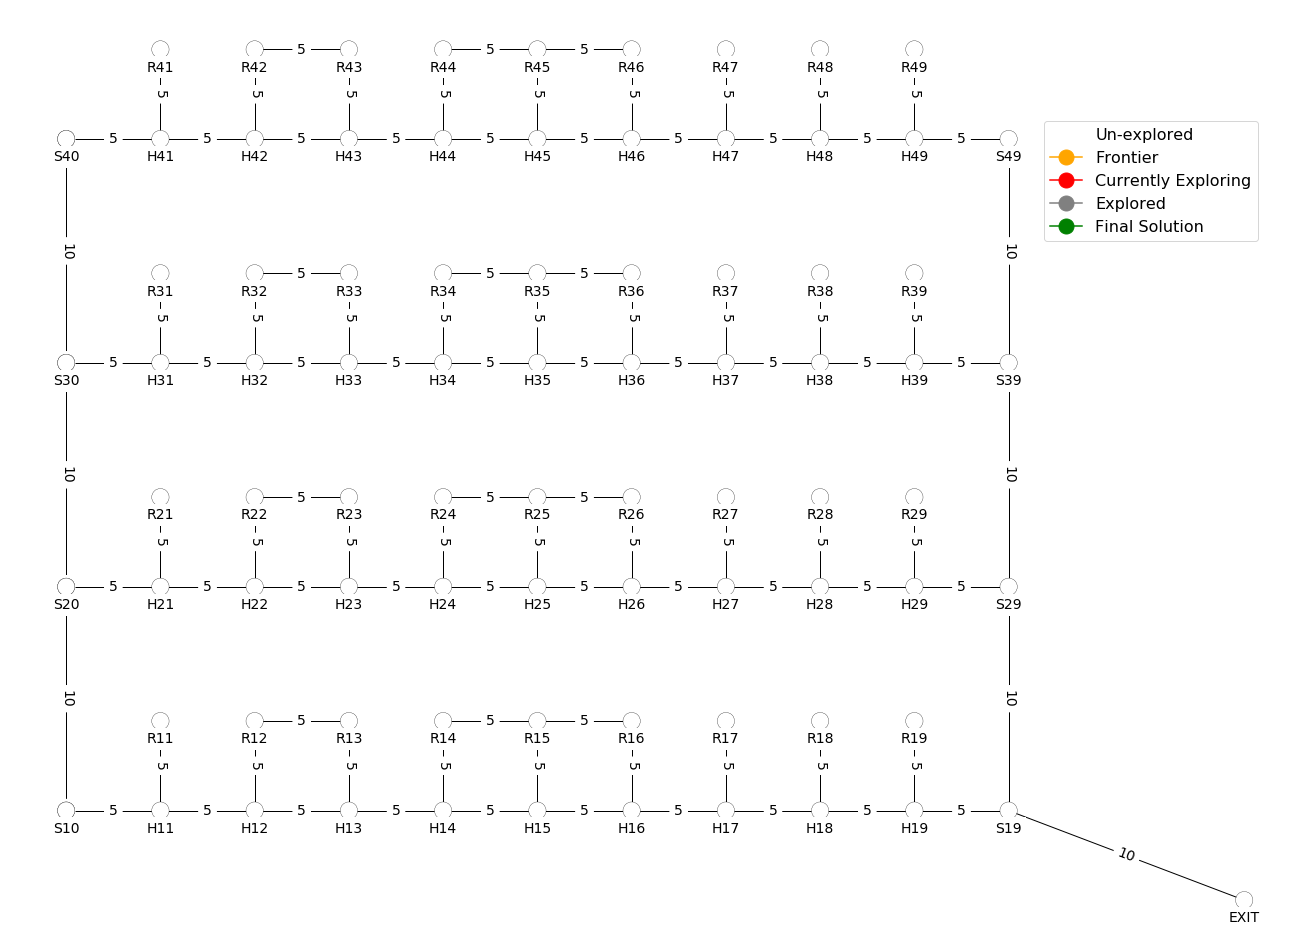

In [8]:
show_map(room_graph_data)

In [9]:
xnode_label_pos

{'H10': [40, 48],
 'H11': [50, 48],
 'H12': [60, 48],
 'H13': [70, 48],
 'H14': [80, 48],
 'H15': [90, 48],
 'H16': [100, 48],
 'H17': [110, 48],
 'H18': [120, 48],
 'H19': [130, 48],
 'S10': [40, 48],
 'R11': [50, 58],
 'R12': [60, 58],
 'R13': [70, 58],
 'R14': [80, 58],
 'R15': [90, 58],
 'R16': [100, 58],
 'R17': [110, 58],
 'R18': [120, 58],
 'R19': [130, 58],
 'S19': [140, 48],
 'EXIT': [165, 38],
 'H20': [40, 73],
 'H21': [50, 73],
 'H22': [60, 73],
 'H23': [70, 73],
 'H24': [80, 73],
 'H25': [90, 73],
 'H26': [100, 73],
 'H27': [110, 73],
 'H28': [120, 73],
 'H29': [130, 73],
 'S20': [40, 73],
 'R21': [50, 83],
 'R22': [60, 83],
 'R23': [70, 83],
 'R24': [80, 83],
 'R25': [90, 83],
 'R26': [100, 83],
 'R27': [110, 83],
 'R28': [120, 83],
 'R29': [130, 83],
 'S29': [140, 73],
 'H30': [40, 98],
 'H31': [50, 98],
 'H32': [60, 98],
 'H33': [70, 98],
 'H34': [80, 98],
 'H35': [90, 98],
 'H36': [100, 98],
 'H37': [110, 98],
 'H38': [120, 98],
 'H39': [130, 98],
 'S30': [40, 98],
 'R3

In [10]:
psource(show_map)

In [11]:
def tree_breadth_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Don't worry about repeated paths to a state. [Figure 3.7]"""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    #Adding first node to the queue
    frontier = deque([Node(problem.initial)])
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        #Popping first node of queue
        node = frontier.popleft()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

def breadth_first_tree_search(problem):
    "Search the shallowest nodes in the search tree first."
    iterations, all_node_colors, node = tree_breadth_search_for_vis(problem)
    return(iterations, all_node_colors, node)

In [12]:
from ipywidgets import *

In [13]:
all_node_colors = []
room_problem = GraphProblem('R35', 'EXIT', room_map)
a, b, c = breadth_first_tree_search(room_problem)
display_visual(room_graph_data, user_input=False, 
               algorithm=breadth_first_tree_search, 
               problem=room_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

In [16]:
def tree_depth_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Don't worry about repeated paths to a state. [Figure 3.7]"""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    #Adding first node to the stack
    frontier = [Node(problem.initial)]
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        #Popping first node of stack
        node = frontier.pop()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

def depth_first_tree_search(problem):
    "Search the deepest nodes in the search tree first."
    iterations, all_node_colors, node = tree_depth_search_for_vis(problem)
    return(iterations, all_node_colors, node)

In [17]:
all_node_colors = []
room_problem = GraphProblem('R35', 'EXIT', room_map)
a, b, c = breadth_first_tree_search(room_problem)
display_visual(room_graph_data, user_input=False, 
               algorithm=depth_first_tree_search, 
               problem=room_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…